In [1]:
import sys
import mysql.connector
from mysql.connector import Error
import mahotas
from skimage.feature import greycomatrix,greycoprops
from pylab import gray,imshow,show
import numpy
import skimage.measure
numpy.set_printoptions(threshold=sys.maxsize)

(64, 64)
[[101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101]
 [101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101]
 [101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101]
 [101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
  101 101 101 101 101 101 101 101 101 101 101 10

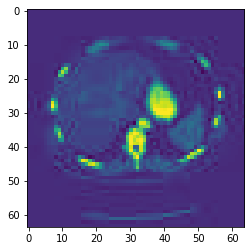

In [2]:
img = mahotas.imread('/home/kailash/DIP Project/archive/AbdomenCT/000011.jpeg')
print(img.shape)
print(img)
imshow(img)

In [3]:
#what is glcm ? it is a co occurring histogram of grayscale values. many important 
#details like can be extracted 
gcm = greycomatrix(img,[1],[0,(numpy.pi)/4,numpy.pi/2,3*(numpy.pi)/4])
print("Before normalizing")
print(numpy.squeeze(gcm))
#normalizing the glcm
gcm_min=numpy.min(gcm)
gcm_max=numpy.max(gcm)
gcm = (gcm-gcm_min) / (gcm_max - gcm_min)

Before normalizing
[[[   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    

In [4]:
#calculate energy from normalized graylevel cooccurrence matrix
#energy = sum (elements in the matrix squared)
sum_sq=0
for i in range(len(gcm)):
    for j in range(i):
        for k in range(j):
            for l in range(k):
                sum_sq=sum_sq+(l**2)
print(sum_sq)

745875153408


In [5]:
#compute entropy
#entropy is avg no of bits needed to represent/transmit 
#the event from pd
#entropy = sum(for each element * log of each element)

ent = -numpy.sum(gcm*numpy.log2(gcm+(gcm==0)))
print("Entropy ",ent)

#shannon entropy prebuilt;it uses the image automatically
#shannon entropy is expected amount of info in the 
#extracted event 
#just showing for comparison

shannon_ent = skimage.measure.shannon_entropy(img)
print("Shannon Entropy ",shannon_ent)

Entropy  88.54962525390407
Shannon Entropy  4.75769093342639


In [6]:
#contrast
#formula - summation of all elements of gcm multiplied by 
cont = numpy.sum(abs(gcm**2)*gcm)
print("Contrast ",cont.round(5))

Contrast  3.15447


In [7]:
#homogeneity
#formula - sum of elements divided by (1+(i-j)^2)
homo = numpy.sum(gcm/(1+(gcm)**2))
print("Homogeneity ",homo.round(5))

Homogeneity  13.09328


In [12]:
def create_db_conn(hostname,userid,pw,db):
    conn=None
    try:
        conn=mysql.connector.connect(host=hostname,user=userid,passwd=pw,database=db)
        print("Connection successful !")
    except Error as er:
        print(f"Error : '{er}'")
    return conn

def create_db(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("DB created successfully!")
    except Error as er:
        print(f"Error : '{er}'")
        
def execute_query(connection,query,val):
    cursor = connection.cursor()
    try:
        cursor.execute(query,val)
        connection.commit()
        print("Query successful")
    except Error as er:
        print(f"Error:'{er}'")

In [14]:
#EST. DB CONNECTION
connect = create_db_conn("localhost","root","Skailash@2k","radiomix")

Connection successful !


In [15]:
entropy = str(round(ent,5))
contrast = str(round(cont,5))
homogeneity = str(round(homo,5))

In [16]:
insert_q = "INSERT INTO glcm VALUES(%s,%s,%s,%s,%s)"
id=int(input())
val = (sum_sq,entropy,contrast,homogeneity,id)
execute_query(connect,insert_q,val)

1
Query successful
